# Checkpoint 1

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [6]:
df = pd.read_csv('/content/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [7]:
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset?

In [8]:
print(df["YEAR"].unique())
print(df["YEAR"].nunique()) # prints out how many unique years of data are logged in the dataset

[1992 2000 2003 2005 2007 2009 2011 2013 2015 1990 2017 1996 2019]
13


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [9]:
# average state grade 8 math scores
state_averages = df.groupby(["STATE"])["AVG_MATH_8_SCORE"].mean()
# compare Michigan vs. Ohio
state_averages["MICHIGAN"] > state_averages["OHIO"]

# Output is False, so Ohio has the higher average across all years for grade 8 math test.

False

Find the average for your chosen test across all states in 2019

In [10]:
states_avg_by_year = df.groupby(["YEAR"])
states_avg_by_year["AVG_MATH_8_SCORE"].mean()
# The average is 281.264151 for 2019

,AVG_MATH_8_SCORE
YEAR,
1990,263.000000
1992,266.325581
1996,270.000000
2000,271.404762
2003,276.943396
2005,277.867925
2007,280.773585
2009,282.509434
2011,283.584906


For each state, find a maximum value for your chosen test score

In [11]:
max_score_by_state = df.groupby(["STATE"])["AVG_MATH_8_SCORE"].max()
max_score_by_state

,AVG_MATH_8_SCORE
STATE,
ALABAMA,269.0
ALASKA,283.0
ARIZONA,283.0
ARKANSAS,279.0
CALIFORNIA,277.0
COLORADO,292.0
CONNECTICUT,289.0
DELAWARE,284.0
DISTRICT_OF_COLUMBIA,269.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [19]:
# Create a new column for state's expenditure per student
expenditure_per_student = df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ENROLL_ALL']
df

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,1.004650
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,1.496312
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,1.095128
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,1.621537
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,1.691007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0,NaN
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0,NaN
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0,NaN
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0,NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

To address some states with more funding for education resources, introducing a new predictor variable expenditure_per_student will allow us to account for this discrepancy and more accurately predict the performance of students.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

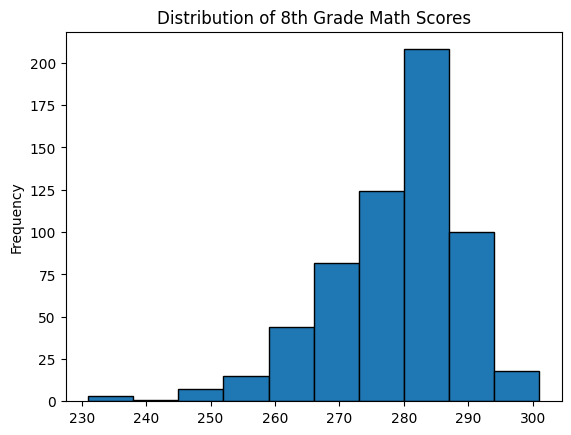

In [31]:
# Plot distribution of AVG_MATH_8_SCORE
df.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")
# Ditr. is left-skewed

Text(0.5, 1.0, '8th Grade Math Score Over Time')

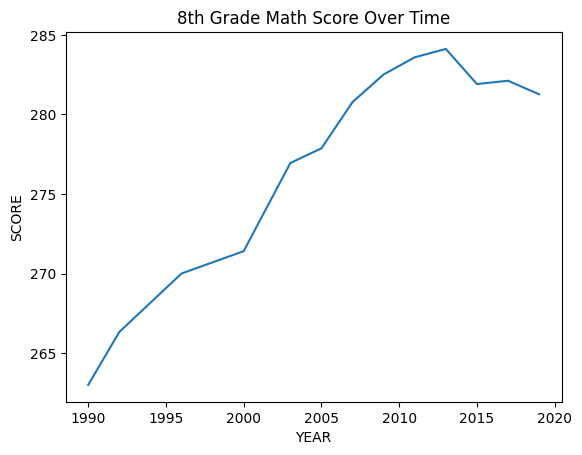

In [20]:
# First predictor: YEAR

df.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

**<CAPTION FOR VIZ 1>**

Observation: The yearly average of 8th grade math score increases steeply from 1990 to about 2013, from which point starts to decrease.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

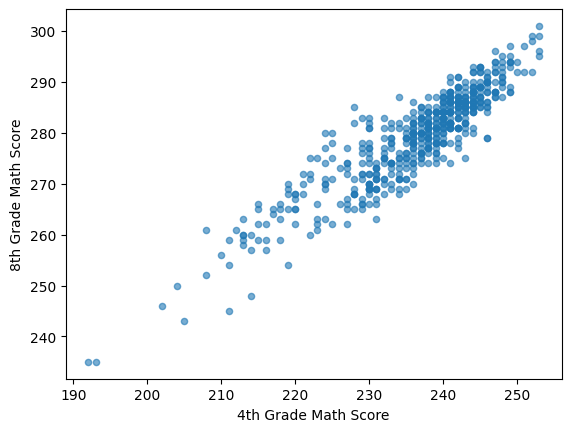

In [27]:
# Second predictor: AVG_MATH_4_SCORE

df.plot.scatter(x='AVG_MATH_4_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('4th Grade Math Score')
plt.ylabel('8th Grade Math Score')

**<CAPTION FOR VIZ 2>**

There seems to be a strong positive linear correlation between 4th grade math score and 8th grade math score.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [28]:
from sklearn.model_selection import train_test_split

In [30]:
# X =
# y =
X = df[['YEAR','AVG_MATH_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [35]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [36]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [37]:
# create your model here
# model =
model = LinearRegression()

In [38]:
model.fit(X_train, y_train)

LinearRegression()

In [39]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [40]:
# I chose R^2, which measures the percent of variation in y explained by its linear relationship with X
model.score(X_test, y_test)

# 85% is a high percentage, which shows the least squares linear regression is a good model fit

0.8511930595116229

We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [46]:
# col_name = 'COLUMN NAME OF ONE PREDICTOR"

# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior On Training Set')

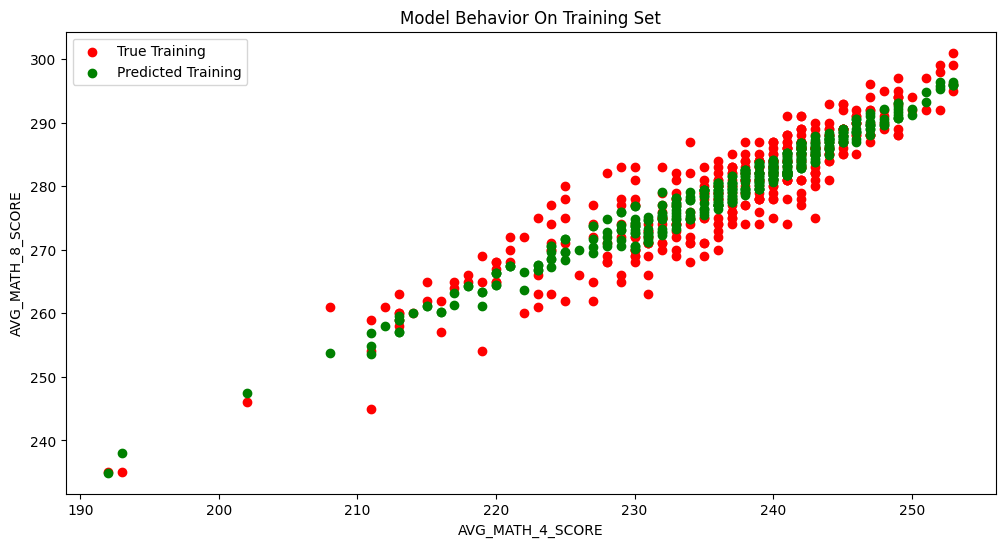

In [47]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('AVG_MATH_8_SCORE')
plt.title("Model Behavior On Training Set")